In [1]:
"""
Python 3.7 house_price_prediction
File name: house_price_prediction.ipynb

Version: 0.1
Author: xGino
Date: 08/09/2023
"""

'\nPython 3.7 house_price_prediction\nFile name: house_price_prediction.ipynb\n\nVersion: 0.1\nAuthor: xGino\nDate: 08/09/2023\n'

# Predicting the house prices
In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of houses.

## 1. Problem definition
`How well can we predict the future sale price of houses, given it characteristics and previous examples of how much similar houses have beel sold for?`

## 2. Data
The data is dowloaded from the Kaggle House Prices - Advanced Regression Techniques: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

There are 4 main datasets:
* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## 3. Evaluation
The evaluation metric for this competition is the RMSE (root mean squared error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error, For example our goals for this project will be to build a machine learning moddel with minimise RMSE.

## 4. Features
Kaggle provides a data description detailing all of the features of the dataset. You can view this data description on a text editor after download: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt

In [2]:
'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

In [3]:
'''Import basic modules.'''
import pandas as pd
import numpy as np
from scipy import stats

In [4]:
'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [5]:
'''Read in the train and test data from csv file'''

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [6]:
train.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

In [7]:
test.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  

[3 rows x 80 columns]

In [8]:
'''Dimensions of train and test data'''
bold('**Shape of our train and test data:**')
display(train.shape, test.shape)

**Shape of our train and test data:**

(1460, 81)

(1459, 80)

In [9]:
"""Let's first inspect how many kinds of data types that we have to deal with."""
merged = pd.concat([train, test], axis=0, sort=True)
bold('**Data types of our variables:**')
display(merged.dtypes.value_counts())

**Data types of our variables:**

object     43
int64      26
float64    12
dtype: int64

In [10]:
'''Extract numerical variables first.'''
num_merged = merged.select_dtypes(include = ['int64', 'float64'])
bold('**Numerical variables:**')
display(num_merged.head(3))
bold('**Name of numerical variables:**')
display(num_merged.columns.values)

**Numerical variables:**

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0       856       854          0             3       706.0         0.0   
1      1262         0          0             3       978.0         0.0   
2       920       866          0             3       486.0         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  OverallQual  \
0           1.0           0.0      150.0              0  ...            7   
1           0.0           1.0      284.0              0  ...            6   
2           1.0           0.0      434.0              0  ...            7   

   PoolArea  SalePrice  ScreenPorch  TotRmsAbvGrd  TotalBsmtSF  WoodDeckSF  \
0         0   208500.0            0             8        856.0           0   
1         0   181500.0            0             6       1262.0         298   
2         0   223500.0            0             6        920.0           0   

   YearBuilt  YearRemodAdd  YrSold  
0       2003          2003    2008  
1       1976          1976    2007  
2       2001          2002    2008  

[3 rows x 38 columns]

**Name of numerical variables:**

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'], dtype=object)

In [11]:
'''Plot histogram of numerical variables to validate pandas intuition.'''
fig, axes = plt.subplots(nrows = 19, ncols = 2, figsize = (40, 200))
for ax, column in zip(axes.flatten(), num_merged.columns):
    sns.distplot(num_merged[column].dropna(), ax = ax, color = 'darkred')
    ax.set_title(column, fontsize = 43)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
    ax.set_xlabel('')
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

In [12]:
'''Convert MSSubClass, OverallQual, OverallCond, MoSold, YrSold into categorical variables.'''
merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')

In [13]:
'''Check out the data types after correction'''
bold('**Data types after correction:**')
display(merged.dtypes.value_counts())

**Data types after correction:**

object     48
int64      21
float64    12
dtype: int64

In [14]:
'''Extract train and test data from the combined data set.'''
df_train = merged.iloc[:1460, :].drop(columns = ['Id'], axis = 1)
df_test = merged.iloc[1460:, :].drop(columns = ['Id', 'SalePrice'], axis = 1) # SalePrice due to concatenation

In [15]:
'''Function to plot bar chart'''
def bar_plot(x, y, title, yaxis, c_scale):
    trace = go.Bar(
    x = x,
    y = y,
    marker = dict(color = y, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

'''Function to plot scatter plot'''
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers',
    marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)    
    
'''Function to plot histogram'''
def plot_histogram(x, title, yaxis, color):
    trace = go.Histogram(x = x,
                        marker = dict(color = color))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

## Outliers Treatment

In [18]:
'''Sactter plot of GrLivArea vs SalePrice.'''
scatter_plot(df_train.GrLivArea, df_train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

In [19]:
'''Drop observations where GrLivArea is greater than 4000 sq.ft'''
df_train.drop(df_train[df_train.GrLivArea>4000].index, inplace = True)
df_train.reset_index(drop = True, inplace = True)

In [20]:
'''Plot the sactter plot again of GrLivArea vs SalePrice to see if outliers are gone.'''
scatter_plot(df_train.GrLivArea, df_train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

## Imputing Missing Variables

In [21]:
'''Separate our target variable first.'''
y_train = df_train.SalePrice

'''Drop SalePrice from train data.'''
df_train.drop('SalePrice', axis = 1, inplace = True)

'''Now combine train and test data frame together.'''
df_merged = pd.concat([df_train, df_test], axis = 0)

In [22]:
'''Columns with missing observations.'''
missing_columns = df_merged.columns[df_merged.isnull().any()].values
'''Number of columns with missing observations.'''
total_columns = np.count_nonzero(df_merged.isna().sum())
print('We have ' , total_columns ,  'features with missing values and those features (with missing values) are: \n\n' , missing_columns)

We have  34 features with missing values and those features (with missing values) are: 

 ['Alley' 'BsmtCond' 'BsmtExposure' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtFinType1' 'BsmtFinType2' 'BsmtFullBath' 'BsmtHalfBath' 'BsmtQual'
 'BsmtUnfSF' 'Electrical' 'Exterior1st' 'Exterior2nd' 'Fence'
 'FireplaceQu' 'Functional' 'GarageArea' 'GarageCars' 'GarageCond'
 'GarageFinish' 'GarageQual' 'GarageType' 'GarageYrBlt' 'KitchenQual'
 'LotFrontage' 'MSZoning' 'MasVnrArea' 'MasVnrType' 'MiscFeature' 'PoolQC'
 'SaleType' 'TotalBsmtSF' 'Utilities']


In [23]:
'''Get and plot only the features (with missing values) and their corresponding missing values.'''
missing_columns = len(df_merged) - df_merged.loc[:, np.sum(df_merged.isnull())>0].count()
x = missing_columns.index
y = missing_columns
title = 'Variables with Missing Values'
scatter_plot(x, y, title, 'Features Having Missing Observations','Missing Values', 30, 'Picnic')

In [24]:
'''Impute by None where NaN means something.'''
to_impute_by_none = df_merged.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in to_impute_by_none.columns:
    df_merged[i].fillna('None', inplace = True)

In [25]:
'''These are categorical variables and will be imputed by mode.'''
to_impute_by_mode = df_merged.loc[:, ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']]
for i in to_impute_by_mode.columns:
    df_merged[i].fillna(df_merged[i].mode()[0], inplace = True)

In [26]:
'''The following variables are either discrete numerical or continuous numerical variables.So the will be imputed by median.'''
to_impute_by_median = df_merged.loc[:, ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']]
for i in to_impute_by_median.columns:
    df_merged[i].fillna(df_merged[i].median(), inplace = True)

In [27]:
'''Columns remaining to be imputed'''
display(df_merged.columns[df_merged.isna().any()].values)

array(['LotFrontage'], dtype=object)

In [28]:
"""Let's create a function to find the variables correlated with LotFrontage"""
def corr(correlation, variable):
    from sklearn.preprocessing import LabelEncoder # Convert categorical variables into numerical
    correlation = correlation.agg(LabelEncoder().fit_transform)
    correlation['LotFrontage'] = variable
    corr = correlation.corr()
    display(corr['LotFrontage'].sort_values(ascending = False)[:5])
    display(corr['LotFrontage'].sort_values(ascending = False)[-5:])

In [29]:
'''Correlation of LotFrontage with categorical data.'''
bold("**LotFrontage's correlation with categorical data:**")
corr(df_merged.select_dtypes(include = ['object']), df_merged.LotFrontage)

**LotFrontage's correlation with categorical data:**

LotFrontage     1.000000
OverallQual     0.204049
RoofStyle       0.180168
Exterior2nd     0.130137
Neighborhood    0.124097
Name: LotFrontage, dtype: float64

LotConfig    -0.191358
GarageType   -0.294884
MSSubClass   -0.396307
BldgType     -0.485279
Utilities          NaN
Name: LotFrontage, dtype: float64

In [30]:
'''Impute LotFrontage with the median of highest correlated column(i.e., BldgType)'''
df_merged.LotFrontage = df_merged.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [31]:
'''Is there any missing values left untreated??'''
print('Missing variables left untreated: ', df_merged.columns[df_merged.isna().any()].values)

Missing variables left untreated:  []


## Transformation of Distributions

In [33]:
'''Plot the distribution of SalePrice with skewness.'''
title = 'SalePrice without Transformation (skewness: {:0.4f})'.format(y_train.skew())
plot_histogram(y_train, title, 'Abs Frequency', 'darkred')

In [34]:
'''Plot the distribution of SalePrice removing skewness.'''
y_train = np.log1p(y_train)
title = 'SalePrice after Transformation (skewness: {:0.4f})'.format(y_train.skew())
plot_histogram(y_train, title, 'Abs Frequency', 'green')

In [35]:
'''Now calculate and plot the skewness for rest of the explanetory variables.'''
skew_merged = pd.DataFrame(data = df_merged.select_dtypes(include = ['int64', 'float64']).skew(), columns = ['Skewness'])
skew_merged_sorted = skew_merged.sort_values(ascending = False, by = 'Skewness')
bar_plot(skew_merged_sorted.index, skew_merged_sorted.Skewness, 'Skewness in Explanetory Variables', 'Skewness', 'Bluered')

In [36]:
'''Extract numeric variables merged data.'''
df_merged_num = df_merged.select_dtypes(include = ['int64', 'float64'])

In [37]:
'''Get the index of the data to be transformed'''
bold('**Features to be transformed (skewness>0.75):**')
display(df_merged_num.skew()[df_merged_num.skew()>0.75].index.values) 
# So these are the variables to be transformed.

**Features to be transformed (skewness>0.75):**

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'GrLivArea',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'ScreenPorch',
       'WoodDeckSF'], dtype=object)

In [38]:
'''Make the transformation.'''
df_merged_skewed = np.log1p(df_merged_num[df_merged_num.skew()[df_merged_num.skew()>0.75].index])
df_merged_normal = df_merged_num[df_merged_num.skew()[df_merged_num.skew()< 0.75].index] # Normal variables
df_merged_num_all = pd.concat([df_merged_skewed, df_merged_normal], axis = 1)

In [39]:
'''Update numerical variables with transformed variables.'''
df_merged_num.update(df_merged_num_all)

c:\Users\gingg\Documents\GitHub\house-price-prediction\wenv\lib\site-packages\pandas\core\frame.py:7511: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Bivariate Analysis

In [40]:
'''Fit label encoder to find the correlated variables.'''
from sklearn.preprocessing import LabelEncoder
df_corr = pd.concat([df_merged.iloc[0:1456, :], y_train], axis = 1)
df_corr = df_corr.agg(LabelEncoder().fit_transform)
df_corr = df_corr.corr()
bold('**Best 10 Positively Correlated Variables:**')
display(df_corr['SalePrice'].sort_values(ascending = False)[:11]) # Best 10 positively correlated
bold('**Best 10 Negatively Correlated Variables:**')
display(df_corr['SalePrice'].sort_values(ascending = False)[-10:]) # Best 10 negatively correlated

**Best 10 Positively Correlated Variables:**

SalePrice       1.000000
OverallQual     0.819885
GrLivArea       0.737118
GarageCars      0.680034
GarageArea      0.664054
TotalBsmtSF     0.633474
YearBuilt       0.618314
FullBath        0.616308
1stFlrSF        0.599499
YearRemodAdd    0.580152
GarageYrBlt     0.532280
Name: SalePrice, dtype: float64

**Best 10 Negatively Correlated Variables:**

KitchenAbvGr   -0.161072
MSZoning       -0.232167
LotShape       -0.292313
BsmtExposure   -0.303445
HeatingQC      -0.448559
GarageFinish   -0.449363
GarageType     -0.513152
KitchenQual    -0.554800
BsmtQual       -0.598646
ExterQual      -0.611179
Name: SalePrice, dtype: float64

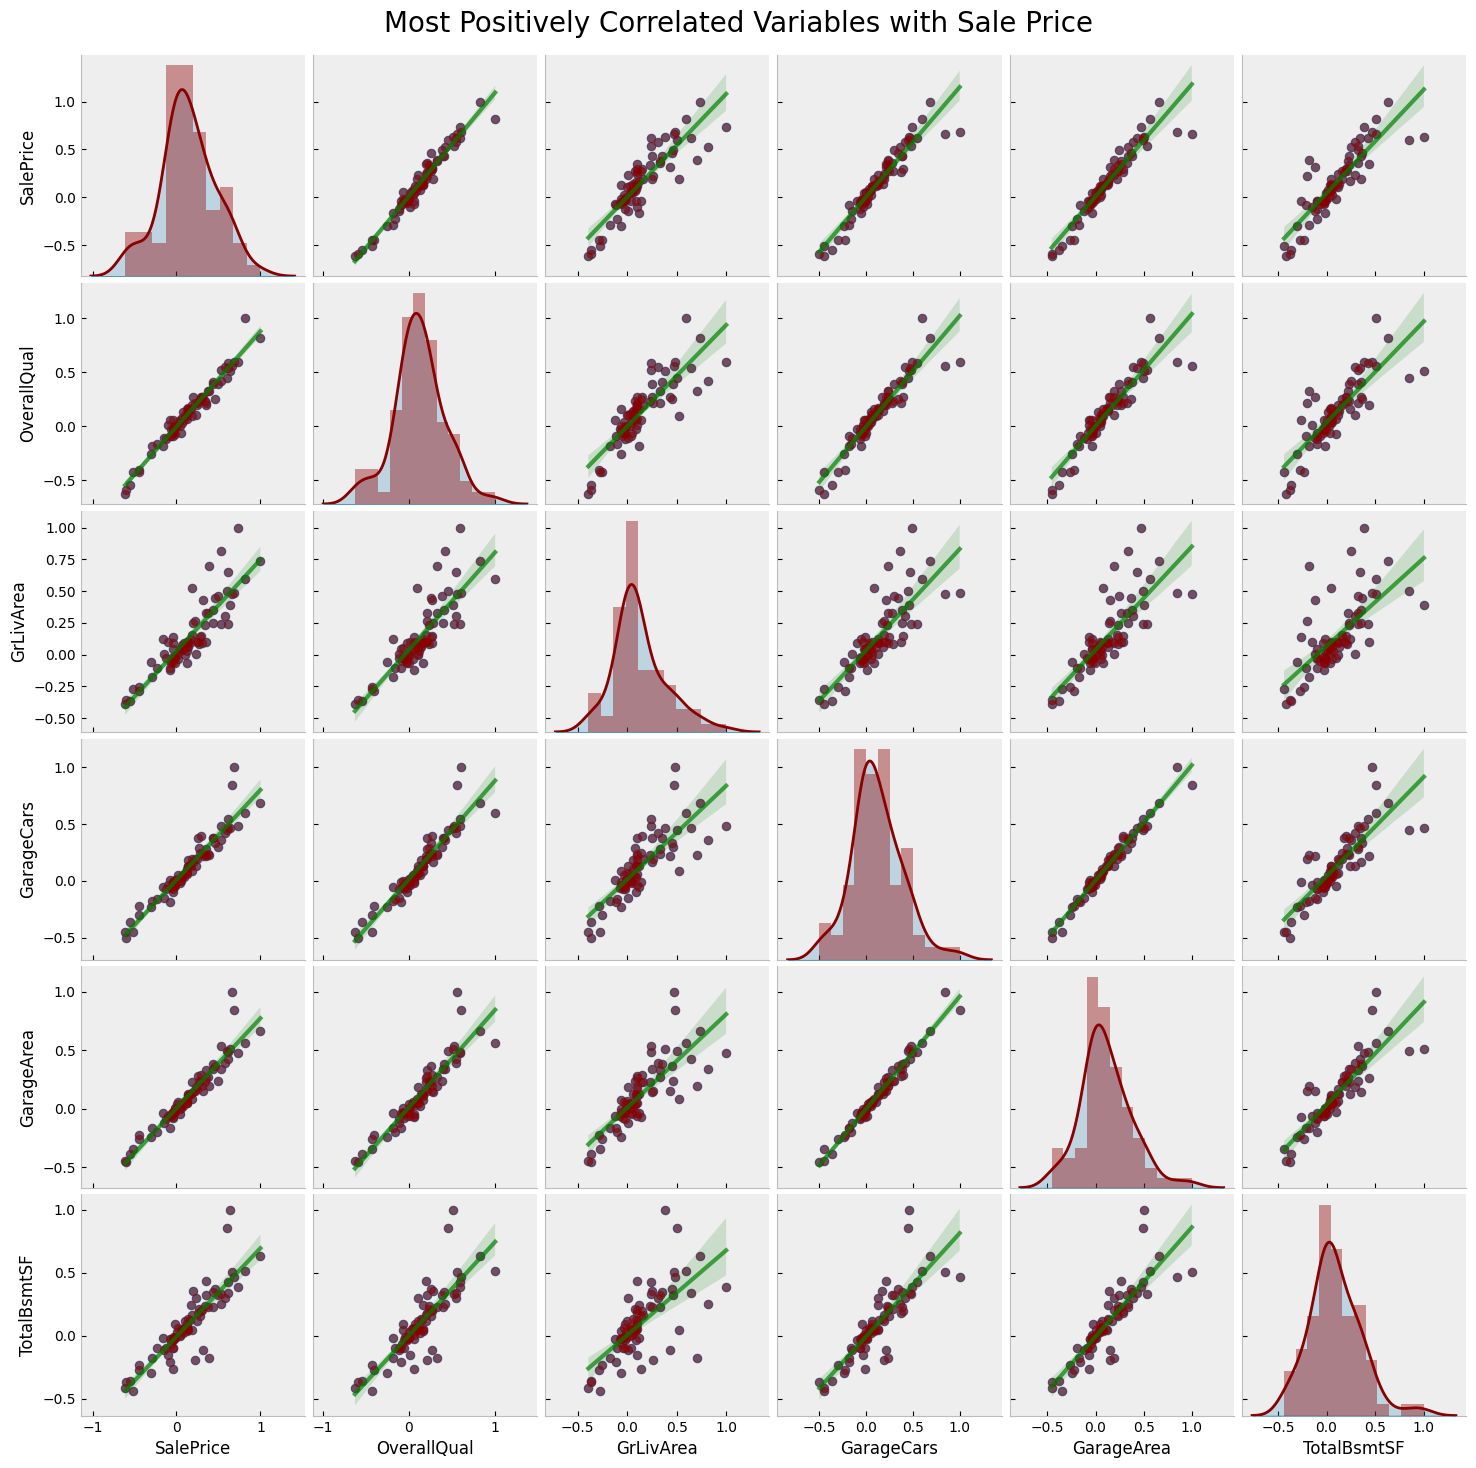

In [41]:
'''We can also create a scatter plot matrix of positively correlated variables (top 5) with SalePrice.'''
corr_positive = df_corr.loc[:, ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
g = sns.pairplot(corr_positive, kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws':{'color':'green', 'alpha': 0.7}}) 
g = g.map_diag(sns.distplot, color = 'darkred')
g = g.map_offdiag(plt.scatter, alpha = 0.5, color = 'darkred')
g.fig.suptitle('Most Positively Correlated Variables with Sale Price', fontsize = 20)
plt.subplots_adjust(top = 0.95)

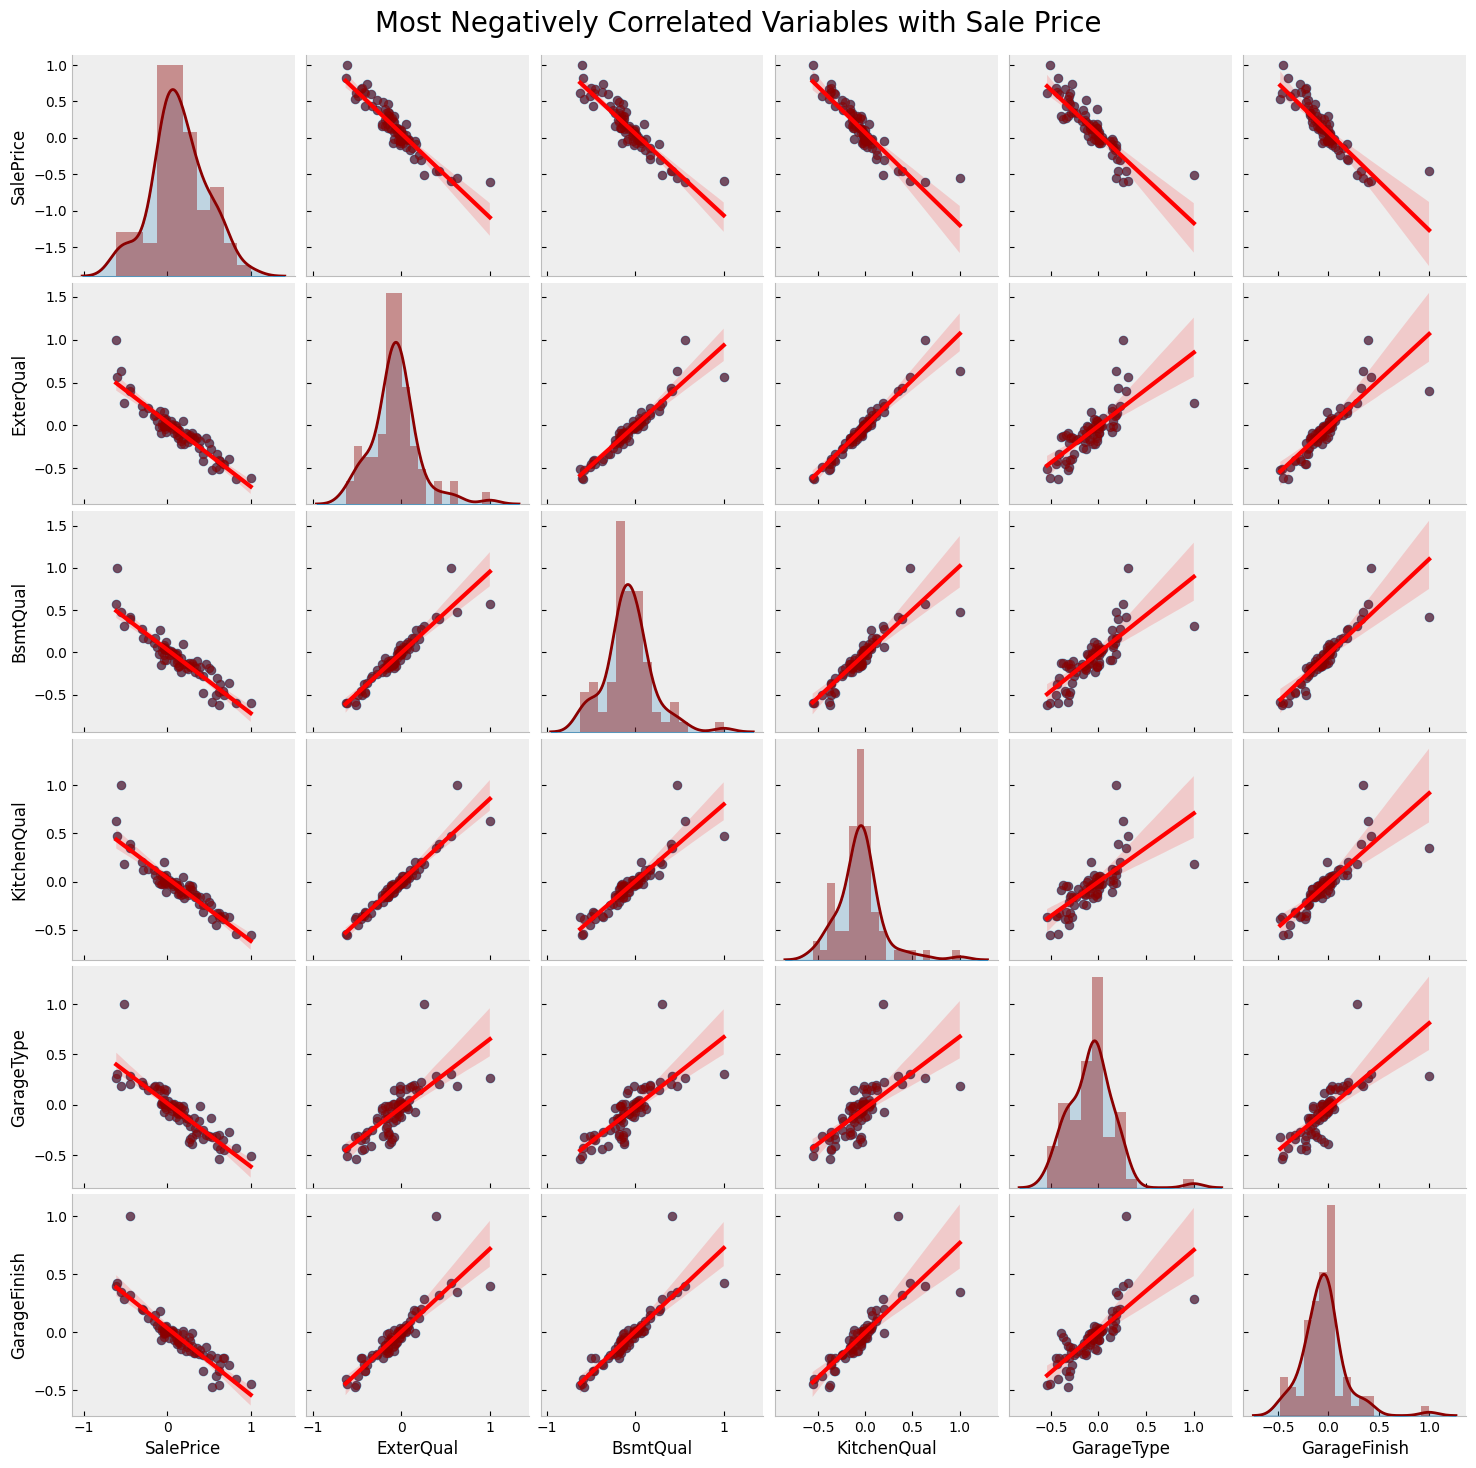

In [42]:
""" In the same way, let's also create a scatter plot matrix of negatively correlated variables (top 5) with SalePrice."""
corr_neg = df_corr.loc[:, ['SalePrice', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageType', 'GarageFinish']]
g = sns.pairplot(corr_neg, kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws':{'color':'red'}})
g = g.map_diag(sns.distplot, color = 'darkred')
g = g.map_offdiag(plt.scatter, alpha = 0.5, color = 'darkred')
g.fig.suptitle('Most Negatively Correlated Variables with Sale Price', fontsize = 20)
plt.subplots_adjust(top = 0.95)

## Numerical and Numerical Variable 

In [43]:
'''Plot regression plot to see how SalePrice is correlated with numerical variables.'''
corr_num = df_merged.loc[:, ['GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearRemodAdd', 'GarageYrBlt']]
corr_num = corr_num.iloc[0:1456, :]
for i in corr_num.columns:
    x = corr_num[i]
    y = y_train
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x + intercept

    # Creating the dataset, and generating the plot
    trace0 = go.Scatter(
                  x = x,
                  y = y,
                  mode = 'markers',
                  marker = dict(color = 'red'),
                  name ='Data'
                  )
    
    # Creating regression line
    trace1 = go.Scatter(
                  x = x,
                  y = line,
                  mode='lines',
                  marker = dict(color = 'green'),
                  name='Fit'
                  )

    # Layout for regression plot
    title = '{} vs SalePrice (r: {:0.4f}, p: {})'.format(corr_num[i].name, r_value, p_value)
    layout = go.Layout(
            title = title, yaxis = dict(title = 'SalePrice'))

    data = [trace0, trace1]
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

## Categorical andNumerical Variable

In [44]:
'''Create boxplots to see the association between categorical and target variables.'''
corr_cat = df_merged.loc[:, ['OverallQual', 'GarageCars', 'FullBath', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageType', 'GarageFinish', 'HeatingQC', 'BsmtExposure', 'LotShape', 'MSZoning', 'KitchenAbvGr']]
corr_cat = corr_cat.iloc[0:1456, :]
for i in corr_cat.columns:
    trace = go.Box(x = corr_cat[i], y = y_train, marker = dict (color = 'magenta'))
    data = [trace]
    layout = go.Layout(title = '{} vs SalePrice'.format(i), yaxis = dict(title = 'SalePrice'))
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

## Feature Engineering

In [45]:
'''Create Feature TotalSF'''
df_merged_num['TotalSF'] = df_merged_num['TotalBsmtSF'] + df_merged_num['1stFlrSF'] + df_merged_num['2ndFlrSF']

c:\Users\gingg\Documents\GitHub\house-price-prediction\wenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
'''Standarize numeric features with RobustScaler'''
from sklearn.preprocessing import RobustScaler

'''Initialize robust scaler object.'''
robust_scl = RobustScaler()

'''Fit scaler object on train data.'''
robust_scl.fit(df_merged_num)

'''Apply scaler object to both train and test data.'''
df_merged_num_scaled = robust_scl.transform(df_merged_num)

In [47]:
'''Retrive column names'''
df_merged_num_scaled = pd.DataFrame(data = df_merged_num_scaled, columns = df_merged_num.columns, index = df_merged_num.index)
# Pass the index of index df_merged_num, otherwise it will sum up the index.

In [48]:
"""Let's extract categorical variables first and convert them into category."""
df_merged_cat = df_merged.select_dtypes(include = ['object']).astype('category')

"""let's begin the tedious process of label encoding."""
df_merged_cat.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
df_merged_cat.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
df_merged_cat.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df_merged_cat.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

In [49]:
'''All the encodeded variables have int64 dtype except OverallQual and OverallCond. So convert them back into int64.'''
df_merged_cat.loc[:, ['OverallQual', 'OverallCond']] = df_merged_cat.loc[:, ['OverallQual', 'OverallCond']].astype('int64')

'''Extract label encoded variables'''
df_merged_label_encoded = df_merged_cat.select_dtypes(include = ['int64'])

In [50]:
'''Now extract the nominal variables for one hot encoding.'''
df_merged_one_hot = df_merged_cat.select_dtypes(include = ['category'])
df_merged_one_hot = pd.get_dummies(df_merged_one_hot)

In [51]:
"""Let's concate one hot encoded and label encoded variables together."""
df_merged_encoded = pd.concat([df_merged_one_hot, df_merged_label_encoded], axis = 1)

'''Finally join processed categorical and numerical variables.'''
df_merged_processed = pd.concat([df_merged_num_scaled, df_merged_encoded], axis = 1)

In [52]:
'''Now retrive train and test data for modelling.'''
df_train_final = df_merged_processed.iloc[0:1456, :]
df_test_final = df_merged_processed.iloc[1456:, :]

'''And we have our target variable as y_train.'''
y_train = y_train

In [53]:
"""Let's look at our final train and test data for modelling."""
bold('**Updated train data for modelling:**')
display(df_train_final.head(3))
bold('**Updated test data for modelling:**')
display(df_test_final.head(3))

**Updated train data for modelling:**

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0 -0.512612  1.029526        0.0           0.0    0.098563         0.0   
1  0.336748  0.000000        0.0           0.0    0.147903         0.0   
2 -0.354872  1.031651        0.0           0.0    0.042059         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  HeatingQC  \
0           1.0      0.000000  -0.875494            0.0  ...          4   
1           0.0      0.693147  -0.383868            0.0  ...          4   
2           1.0      0.000000  -0.056594            0.0  ...          4   

   KitchenQual  LandContour  LandSlope  LotShape  OverallCond  OverallQual  \
0            2            3          2         3            5            7   
1            1            3          2         3            8            6   
2            2            3          2         2            5            7   

   PavedDrive  PoolQC  Utilities  
0           2       0          1  
1           2       0          1  
2           2       0          1  

[3 rows x 248 columns]

**Updated test data for modelling:**

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0 -0.412702  0.000000        0.0          -1.0    0.036350    4.976734   
1  0.449956  0.000000        0.0           0.0    0.139138    0.000000   
2 -0.335930  0.999458        0.0           0.0    0.115772    0.000000   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  HeatingQC  \
0           0.0           0.0  -0.422852            0.0  ...          2   
1           0.0           0.0  -0.108087            0.0  ...          2   
2           0.0           0.0  -0.945170            0.0  ...          3   

   KitchenQual  LandContour  LandSlope  LotShape  OverallCond  OverallQual  \
0            1            3          2         3            6            5   
1            2            3          2         2            6            6   
2            1            3          2         2            5            5   

   PavedDrive  PoolQC  Utilities  
0           2       0          1  
1           2       0          1  
2           2       0          1  

[3 rows x 248 columns]

## Model Building & Evaluation 

In [54]:
"""Let's have a final look at our data"""
bold('**Data Dimension for Model Building:**')
print('Input matrix dimension:', df_train_final.shape)
print('Output vector dimension:',y_train.shape)
print('Test data dimension:', df_test_final.shape)

**Data Dimension for Model Building:**

Input matrix dimension: (1456, 248)
Output vector dimension: (1456,)
Test data dimension: (1459, 248)


In [57]:

'''Set a seed for reproducibility'''
seed = 43

'''Initialize all the regression models object we are interested in.'''
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


'''We are interested in the following 14 regression models.
All initialized with default parameters except random_state and n_jobs.'''
linear = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
kr = KernelRidge()
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed)
svm = SVR()
knn = KNeighborsRegressor(n_jobs = -1)
rf =  RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
xgb = XGBRegressor(random_state = seed, n_jobs = -1)
lgb = LGBMRegressor(random_state = seed, n_jobs = -1)

In [58]:
'''Training accuracy of our regression models. By default score method returns coefficient of determination (r_squared).'''
def train_r2(model):
    model.fit(df_train_final, y_train)
    return model.score(df_train_final, y_train)

'''Calculate and plot the training accuracy.'''
models = [linear, lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
training_score = []
for model in models:
    training_score.append(train_r2(model))
    
'''Plot dataframe of training accuracy.'''
train_score = pd.DataFrame(data = training_score, columns = ['Training_R2'])
train_score.index = ['LR', 'LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
train_score = (train_score*100).round(4)
scatter_plot(train_score.index, train_score['Training_R2'], 'Training Score (R_Squared)', 'Models','% Training Score', 30, 'Rainbow')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3693
[LightGBM] [Info] Number of data points in the train set: 1456, number of used features: 170
[LightGBM] [Info] Start training from score 12.021950


### 11.2 Model Evaluation 

In [60]:
'''Evaluate models on the holdout set(say on 30%).'''
def train_test_split_score(model):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(df_train_final, y_train, test_size = 0.3, random_state = seed)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(prediction, Y_test)
    rmse = np.sqrt(mse)
    return rmse

'''Calculate train_test_split score of differnt models and plot them.'''
models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
train_test_split_rmse = []
for model in models:
    train_test_split_rmse.append(train_test_split_score(model))

'''Plot data frame of train test rmse'''
train_test_score = pd.DataFrame(data = train_test_split_rmse, columns = ['Train_Test_RMSE'])
train_test_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
train_test_score = train_test_score.round(5)
x = train_test_score.index
y = train_test_score['Train_Test_RMSE']
title = "Models' Test Score (RMSE) on Holdout(30%) Set"
scatter_plot(x, y, title, 'Models','RMSE', 30, 'RdBu')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3313
[LightGBM] [Info] Number of data points in the train set: 1019, number of used features: 159
[LightGBM] [Info] Start training from score 12.032981


### 11.2.1 K-Fold Cross Validation

In [63]:
'''Function to compute cross validation scores.'''
def cross_validate(model):
    from sklearn.model_selection import cross_val_score
    neg_x_val_score = cross_val_score(model, df_train_final, y_train, cv = 10, n_jobs = -1, scoring = 'neg_mean_squared_error')
    x_val_score = np.round(np.sqrt(-1*neg_x_val_score), 5)
    return x_val_score.mean()

'''Calculate cross validation score of differnt models and plot them.'''
models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
cross_val_scores = []
for model in models:
    cross_val_scores.append(cross_validate(model))

'''Plot data frame of cross validation scores.'''
x_val_score = pd.DataFrame(data = cross_val_scores, columns = ['Cross Validation Scores (RMSE)'])
x_val_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
x_val_score = x_val_score.round(5)
x = x_val_score.index
y = x_val_score['Cross Validation Scores (RMSE)']
title = "Models' 10-fold Cross Validation Scores (RMSE)"
scatter_plot(x, y, title, 'Models','RMSE', 30, 'Viridis')

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.
